In [91]:
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt

Getting the data

In [96]:
def get_content(article_name):
    url = 'https://en.wikipedia.org/w/api.php'
    PARAMS = {
                "action": "query",
                "titles": article_name,
                'prop': 'extracts',
                "format": "json",
    }
    response =  requests.get(url, params = PARAMS)
    json_text = response.json()
    raw_text =json_text['query']['pages']['22834']['extract']
    return raw_text

In [97]:
raw_text = get_content("Ozone_layer")
#print(raw_text)

Cleaning

In [98]:
def clean_html(raw_html):
    html =  re.compile('<.*?>')
    cleaned =  re.sub(html, '', raw_html)
    return cleaned

In [99]:
raw_data = clean_html(raw_text)
#print(raw_data)

In [100]:
def merge_contents(data):
    clean_data = re.split("\. |,|\.|\n| |-|\'", data)
    return clean_data

merge_content = merge_contents(raw_data)
#print(merge_content)

Tokenization

In [101]:
def tokenize(content):
    return [word for word in content if word.isalnum() and not word.isdigit() and len(word) > 1]
collection = tokenize(merge_content)
#print(collection)

In [103]:
def lower_collection(collection):
    return [word.lower() for word in collection]
collection = lower_collection(collection)
#print(collection)

In [104]:
def count_frequency(collection):
    return {word: collection.count(word) for word in collection}

In [115]:
frequencies = count_frequency(collection)
#print(frequencies)

In [116]:
def print_most_frequent(frequencies, n): 
    sorted_dict  =  dict(sorted(frequencies.items(), key =lambda x: x[1], reverse = True))
    keys = list(sorted_dict.keys())
    new_dict = {}
    for word in keys[0:n]:
        new_dict[word] = sorted_dict[word]
        print(word, " : ", sorted_dict[word])
    return new_dict

In [117]:
stop_words_file = open("stop_words.txt", 'r')
stop_words = ''
for i in stop_words_file:
    stop_words += i
stop_words = stop_words.split(',')
#print(stop_words)

In [118]:
def remove_stop_words(collection, stop_words):
    return [word for word in collection if word not in stop_words]

In [119]:
filtered_collection = remove_stop_words(collection, stop_words)
frequencies =  count_frequency(filtered_collection)
#print(frequencies)
top_20 = print_most_frequent(frequencies, 20)

ozone  :  79
layer  :  25
radiation  :  16
ultraviolet  :  13
stratosphere  :  12
atmosphere  :  12
earth  :  11
surface  :  10
depletion  :  9
climate  :  8
skin  :  7
united  :  7
oxygen  :  7
out  :  6
stratospheric  :  6
light  :  6
latitudes  :  6
time  :  6
sun  :  5
high  :  5


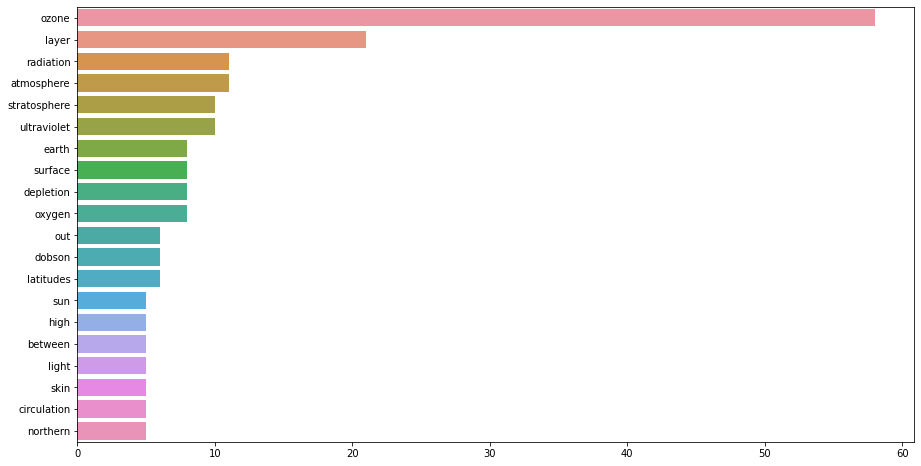

In [90]:
plt.figure(figsize=(15,8))
sns.barplot(x = list(top_20.values()), y = list(top_20.keys()))
plt.show()